## Penobscot volume view using VisPy

Get Penobscot data

In [2]:
import numpy as np

In [3]:
data = np.loadtxt('../Course/day1/data/slicing_seismic.txt')

In [4]:
nILnXL, nt = data.shape

In [5]:
nIL = np.sqrt(nILnXL)
nXL = np.sqrt(nILnXL)

In [6]:
new_data = np.reshape(data, (nIL, nXL, nt))
print (new_data.shape)

(100, 100, 500)


/Users/Evan/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [7]:
z = 122
inline = 30
xline = 60

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline

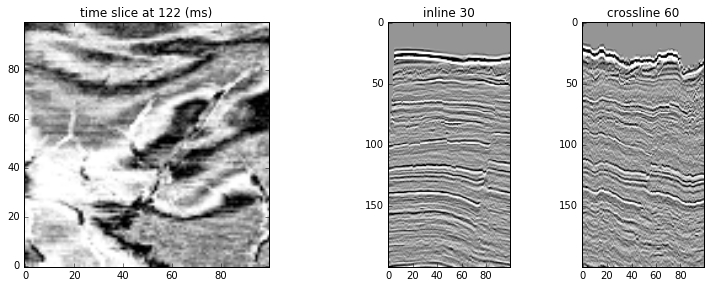

In [9]:
f = plt.figure(figsize=(12,4), facecolor='white')

# Plot timeslice
ax = f.add_axes([0.1, 0.05, 0.35, 0.85])
ax.imshow(np.transpose(new_data[:,::-1,z]), 
            cmap = 'Greys', 
            vmin = -4000, vmax = 4000,
            origin='lower')
ax.set_title('time slice at %d (ms)' % z, fontsize = 12)    

# Plot inline
ax2 = f.add_axes([0.525, 0.05, 0.2, 0.85])
ax2.imshow(np.transpose(new_data[:,inline,:200]), 
            cmap = 'Greys', 
            vmin = -4000, vmax = 4000,
            origin='upper')
ax2.set_title('inline %d' % inline, fontsize = 12)
    
# Plot xline 
ax3 = f.add_axes([0.75, 0.05, 0.2, 0.85])
ax3.imshow(np.transpose(new_data[xline,:,:200]), 
                cmap = 'Greys', 
                vmin = -4000, vmax = 4000,
                origin='upper')
ax3.set_title('crossline %d' % xline, fontsize = 12)

plt.show()

In [10]:
from vispy import io, plot as vp

In [11]:
"""
Plot various views of a cube.
"""

fig = vp.Fig(bgcolor='k', size=(800, 800), show=False)

#vol_data = np.load(io.load_data_file('brain/mri.npz'))['data']
#vol_data = np.flipud(np.rollaxis(vol_data, 1))

vol_data = new_data[:,:,0:200]
vol_data = np.flipud(np.rollaxis(vol_data, 2))

vmin = -5000
vmax = 5000

n = 1 

clim = [vmin,vmax]
vol_pw = fig[0, 0]
vol_pw.volume(vol_data[::n,:,:], clim=clim, cmap='grays')
vol_pw.camera.elevation = 30
vol_pw.camera.azimuth = 30
vol_pw.camera.scale_factor /= 1.5

shape = vol_data.shape
fig[1, 0].image(vol_data[:, :, inline], cmap='grays', clim=clim)
fig[0, 1].image(vol_data[:, xline, :], cmap='grays', clim=clim)
fig[1, 1].image(vol_data[z, :, :].T, cmap='grays', clim=clim)

if __name__ == '__main__':
    fig.show(run=True)

/Users/Evan/anaconda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
